In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools as tools
import matplotlib.pyplot as plt

import souborů:

In [2]:
data_prujezdy = pd.read_csv("points2.csv")
data_pocasi = pd.read_csv("out.c_projekt.pocasi.csv")

úprava data typu u sloupců s datumovou hodnotou:

In [3]:
data_prujezdy["measured_from"]=pd.to_datetime(data_prujezdy["measured_from"]).dt.date
data_pocasi["DATUM"]=pd.to_datetime(data_pocasi["DATUM"]).dt.date

spojení dvou tabulek:

In [4]:
spojene_data = pd.merge(data_pocasi, data_prujezdy, left_on= "DATUM", right_on='measured_from', how='inner')

STATISTICKÁ ČÁST:

In [5]:
data = spojene_data[["value", "PRUMERNA_DENNI_TEPLOTA", "SOUHRN_SRAZEK_MM", "DELKA_SLUN_SVITU","MAX_NARAZ_VETRU_M_S","MAX_RYCHLOST_VETRU_M_S"]]


In [6]:
data.corr()

,value,PRUMERNA_DENNI_TEPLOTA,SOUHRN_SRAZEK_MM,DELKA_SLUN_SVITU,MAX_NARAZ_VETRU_M_S,MAX_RYCHLOST_VETRU_M_S
value,1.000000,0.339623,-0.078771,0.329285,-0.029839,-0.075254
PRUMERNA_DENNI_TEPLOTA,0.339623,1.000000,0.086137,0.608666,0.129560,0.061726
SOUHRN_SRAZEK_MM,-0.078771,0.086137,1.000000,-0.288940,0.225298,0.273963
DELKA_SLUN_SVITU,0.329285,0.608666,-0.288940,1.000000,-0.116041,-0.198760
MAX_NARAZ_VETRU_M_S,-0.029839,0.129560,0.225298,-0.116041,1.000000,0.751351
MAX_RYCHLOST_VETRU_M_S,-0.075254,0.061726,0.273963,-0.198760,0.751351,1.000000


    INTERPRETACE: 
            * korelace mezi počtem cyklistů a teplotou je, ale ta vazba není silná
            * srážky negativně ovlivňují počet cyklistů, ale jen velmi slabě
            * délka slunečního svitu má podobně silnou korelaci na počet cyklistů jako denní teplota
            * nárazy větru a rychlos větru negativně ovlivňuje počet cyklistů ale stejně jako u srážek je to velmi slabá vazba


In [7]:
stat, pval = stats.pearsonr(spojene_data["PRUMERNA_DENNI_TEPLOTA"], spojene_data["value"])
pval

np.float64(0.0)

    INTERPRETACE:
        * mezi dvěma koeficienty neexistuje korelace

In [8]:
stat, pval = stats.kendalltau(spojene_data["PRUMERNA_DENNI_TEPLOTA"], spojene_data["value"])
pval

np.float64(0.0)

    INTERPRETACE:
        * mezi dvěma koeficienty neexistuje korelace

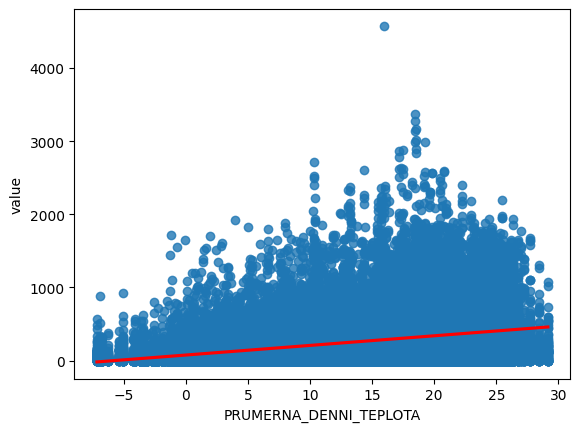

In [9]:
g = sns.regplot(data=spojene_data, x="PRUMERNA_DENNI_TEPLOTA", y="value", line_kws={"color": "red"}, ci=None)

In [10]:
res = smf.ols(formula="value  ~  PRUMERNA_DENNI_TEPLOTA", data=spojene_data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     7442.
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        20:59:32   Log-Likelihood:            -4.0528e+05
No. Observations:               57084   AIC:                         8.106e+05
Df Residuals:                   57082   BIC:                         8.106e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 75.7707      2.075     36.512      0.000      71.703      79.838
PRUMERNA_DENNI_TEPLOTA    13.1602      0.153     86.270      0.000      12.861      13.459
==============================================================================
Omnibus:                    31946.950   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           310948.157
Skew:                           2.554   Prob(JB):                         0.00
Kurtosis:                      13.230   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    INTERPRETACE:
        * v případě, že teplota bude 0°C bude 75 cyklistů
        * a pokud by se teplota zvýšila o 1°C pak by přibylo 13 cyklistů

zde mi výsledky ale nedávají smysl, jelikož tak málo cyklistů nikdy nejezdilo, je tady tady ta 0°C správná hodnota?

In [11]:
new_data = pd.DataFrame({"PRUMERNA_DENNI_TEPLOTA": [1]})
predicted_yield = res.predict(new_data)
predicted_yield

0    88.93083
dtype: float64

In [12]:
res = smf.ols(formula="value  ~ PRUMERNA_DENNI_TEPLOTA + SOUHRN_SRAZEK_MM + DELKA_SLUN_SVITU + MAX_NARAZ_VETRU_M_S + MAX_RYCHLOST_VETRU_M_S", data=spojene_data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     1912.
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        20:59:32   Log-Likelihood:            -4.0436e+05
No. Observations:               57084   AIC:                         8.087e+05
Df Residuals:                   57078   BIC:                         8.088e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 76.2558      5.602     13.611      0.000      65.275      87.237
PRUMERNA_DENNI_TEPLOTA     9.7962      0.206     47.586      0.000       9.393      10.200
SOUHRN_SRAZEK_MM          -3.5800      0.364     -9.844      0.000      -4.293      -2.867
DELKA_SLUN_SVITU          10.6951      0.387     27.661      0.000       9.937      11.453
MAX_NARAZ_VETRU_M_S        0.4672      0.855      0.547      0.585      -1.208       2.143
MAX_RYCHLOST_VETRU_M_S    -8.2344      0.969     -8.500      0.000     -10.133      -6.336
==============================================================================
Omnibus:                    31046.125   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           295971.961
Skew:                           2.466   Prob(JB):                         0.00
Kurtosis:                      13.005   Cond. No.                         84.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

RUMERNA_DENNI_TEPLOTA	0.339623	1.000000	0.086137	0.608666	0.129560	0.061726
SOUHRN_SRAZEK_MM	-0.078771	0.086137	1.000000	-0.288940	0.225298	0.273963
DELKA_SLUN_SVITU	0.329285	0.608666	-0.288940	1.000000	-0.116041	-0.198760
MAX_NARAZ_VETRU_M_S	-0.029839	0.129560	0.225298	-0.116041	1.000000	0.751351
MAX_RYCHLOST_VETRU_M_S

    INTERPRETACE:
        * když vezmeme v potaz více proměných tak na počet cyklistů má větší vliv délka slunečního svitu než průměrná denní teplota
        * maximální rychlost větru negativně ovluvňuje počet cyklistů stejně silně jako průměrná denní teplota pozitivně